In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

sns.set(style="whitegrid")


In [41]:


MallCstdt = pd.read_csv('Mall_Customers.csv')
MallCstdt.columns = MallCstdt.columns.str.strip()

# Basic inspection
print(MallCstdt.head().to_string())
print("\n")
print(MallCstdt.info())
print("\n")
print(MallCstdt.shape)
print("\n")
print("Data Shape:", MallCstdt.shape)
print("\nData Types:\n", MallCstdt.dtypes)
print("\nMissing Values:\n", MallCstdt.isnull().sum())
print("\nSummary Statistics Of Data:\n", MallCstdt.describe(include='all'))

   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


(200, 5)


Data Shape: (200, 5)

Data Types:
 C

In [42]:
DuplicateRowsum = MallCstdt.duplicated().sum()
print("Number of duplicated rows: ",DuplicateRowsum )
print("The Duplicated Rows are: \n", MallCstdt[MallCstdt.duplicated()])
print("\n")
database_withDuplicatedRowsGone = MallCstdt.drop_duplicates()
print("The Database Without the Duplicaed Rows Here \n ", database_withDuplicatedRowsGone.head().to_string())
print("\n")

Number of duplicated rows:  0
The Duplicated Rows are: 
 Empty DataFrame
Columns: [CustomerID, Genre, Age, Annual Income (k$), Spending Score (1-100)]
Index: []


The Database Without the Duplicaed Rows Here 
     CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40




In [ ]:
Partial_Duplicates_Rows_Count = MallCstdt.duplicated(keep=False).sum()
print("The No of Partial Duplicates Rows are: ", Partial_Duplicates_Rows_Count)
print("\n")
MallCstdt_no_partial_duplicates = MallCstdt.drop_duplicates(keep='first')
print(MallCstdt_no_partial_duplicates.head().to_string())

The No of Partial Duplicates Rows are:  0


   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [44]:
print("Missing Values in each Column: \n", MallCstdt.isnull().sum())
print("\n")
print("Percentage of Missing Values in each Column: \n", (MallCstdt.isnull().mean()*100))

Missing_Values_Coloums_Dataframe = pd.DataFrame({
    'Missing_Values_Coloums': MallCstdt.isnull().any(),
    'Missing_Values_Count': MallCstdt.isnull().sum(),
    'Missing_ValuesIn_Percentage': (MallCstdt.isnull().sum() / len(MallCstdt)) * 100
})

print(Missing_Values_Coloums_Dataframe.to_string())

Missing Values in each Column: 
 CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


Percentage of Missing Values in each Column: 
 CustomerID                0.0
Genre                     0.0
Age                       0.0
Annual Income (k$)        0.0
Spending Score (1-100)    0.0
dtype: float64
                        Missing_Values_Coloums  Missing_Values_Count  Missing_ValuesIn_Percentage
CustomerID                               False                     0                          0.0
Genre                                    False                     0                          0.0
Age                                      False                     0                          0.0
Annual Income (k$)                       False                     0                          0.0
Spending Score (1-100)                   False                     0                          0.0


In [45]:
def Imputation_Of_Values(database):
    for column in database.columns:
        if np.issubdtype(database[column].dtype, np.number):
            median_value = database[column].median()
            database[column] = database[column].fillna(median_value)
            print(f"Filled NaN in numeric column '{column}' with Median = {median_value}")
        
        elif database[column].dtype == 'object':
            mode_value = database[column].mode()[0]
            database[column] = database[column].fillna(mode_value)
            print(f"Filled NaN in categorical column '{column}' with Mode = {mode_value}")
        
        elif np.issubdtype(database[column].dtype, np.datetime64):
            database[column] = database[column].interpolate(method='time')
            print(f"Interpolated missing datetime values in '{column}'")
    
    return database

Database_After_Imputation = Imputation_Of_Values(MallCstdt)
print("The Database After Imputation of Missing Values is : \n", Database_After_Imputation.head().to_string())

Filled NaN in numeric column 'CustomerID' with Median = 100.5
Filled NaN in categorical column 'Genre' with Mode = Female
Filled NaN in numeric column 'Age' with Median = 36.0
Filled NaN in numeric column 'Annual Income (k$)' with Median = 61.5
Filled NaN in numeric column 'Spending Score (1-100)' with Median = 50.0
The Database After Imputation of Missing Values is : 
    CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [46]:
print("\n As a first step i am loading the copy of the inital cleaned dataset that i have created! \n ")
CopyMallCsdt = Database_After_Imputation.copy()
print("Shape:", CopyMallCsdt.shape)
print(CopyMallCsdt.head().to_string())



 As a first step i am loading the copy of the inital cleaned dataset that i have created! 
 
Shape: (200, 5)
   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [47]:


print("I am trying to make the cluster of the following coloums of the dataset here")
if 'Genre' in CopyMallCsdt.columns:
    genre_mode = CopyMallCsdt['Genre'].mode()[0]
    CopyMallCsdt['Genre'] = CopyMallCsdt['Genre'].fillna(genre_mode)
    CopyMallCsdt['Genre_Encoded'] = CopyMallCsdt['Genre'].map({'Male': 0, 'Female': 1})
    if CopyMallCsdt['Genre_Encoded'].isnull().any():
        CopyMallCsdt['Genre_Encoded'] = CopyMallCsdt['Genre'].astype('category').cat.codes
else:
    CopyMallCsdt['Genre_Encoded'] = 0

I am trying to make the cluster of the following coloums of the dataset here


In [48]:
print("I am Selecting the Features That Needs to Be Taken for the Clustering Here")

features = [
    'Age',
    'Annual Income (k$)',
    'Spending Score (1-100)',
    'Genre_Encoded'
]




I am Selecting the Features That Needs to Be Taken for the Clustering Here


In [49]:
features = [f for f in features if f in CopyMallCsdt.columns]
CopyMallCsdt_features = CopyMallCsdt[features].astype(float)

In [50]:
print("I am Doing the Standardization Step that Needs to Be executed , that I am doing here")
scaler = StandardScaler()
CopyMallCsdt_scaled = scaler.fit_transform(CopyMallCsdt_features)

I am Doing the Standardization Step that Needs to Be executed , that I am doing here


I am Executing the Elbow Plot asked in the Pdf Here!


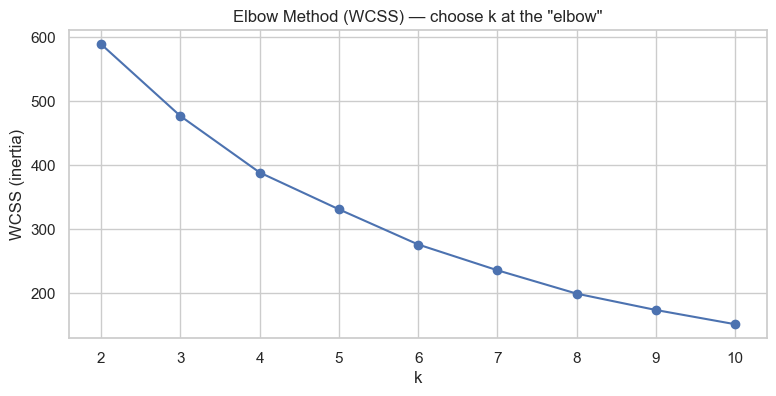

I am Executing the Silhouetter Plot asked in the Pdf Here !


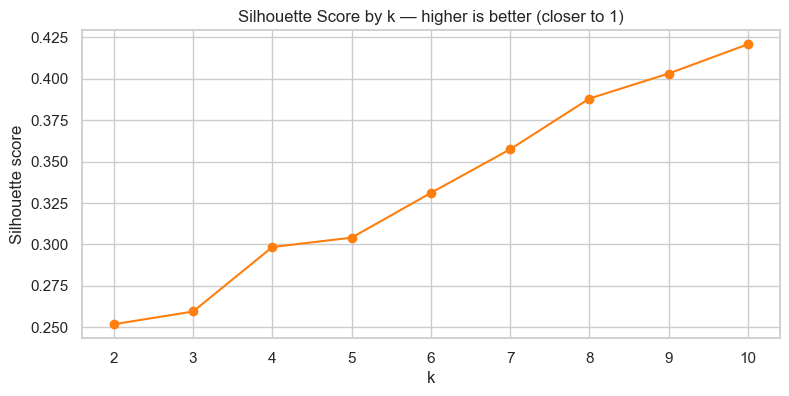

In [ ]:
MallCustMeanHld = []
silhouette_scores = []
k_values = range(2, 11)

for k in k_values:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = km.fit_predict(CopyMallCsdt_scaled)
    MallCustMeanHld.append(km.inertia_)
    try:
        intermedsilscr = silhouette_score(CopyMallCsdt_scaled, labels)
    except Exception:
        intermedsilscr = np.nan
    silhouette_scores.append(intermedsilscr)

print("I am Executing the Elbow Plot asked in the Pdf Here!")
plt.figure(figsize=(9,4))
plt.plot(k_values, MallCustMeanHld, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.xticks(k_values)
plt.show()

print("I am Executing the Silhouetter Plot asked in the Pdf Here !")
plt.figure(figsize=(9,4))
plt.plot(k_values, silhouette_scores, marker='o', color='tab:orange')
plt.title('Silhouette Score by k — higher is better (closer to 1)')
plt.xlabel('k')
plt.ylabel('Silhouette score')
plt.xticks(k_values)
plt.show()

In [52]:
print("I am Directly Apploying the K means Clustering Here after Performing the Above  Following Steps!")

kmostrangd = int(k_values[np.nanargmax(silhouette_scores)])
print(f"\nSelected number of clusters (by silhouette argmax): k = {kmostrangd}")

kmeans = KMeans(n_clusters=kmostrangd, random_state=42, n_init=10)
CopyMallCsdt['Cluster'] = kmeans.fit_predict(CopyMallCsdt_scaled)

print("\nCluster counts:\n", CopyMallCsdt['Cluster'].value_counts().sort_index())

I am Directly Apploying the K means Clustering Here after Performing the Above  Following Steps!

Selected number of clusters (by silhouette argmax): k = 10

Cluster counts:
 Cluster
0    26
1    24
2    14
3    21
4    26
5    19
6    25
7    18
8    13
9    14
Name: count, dtype: int64


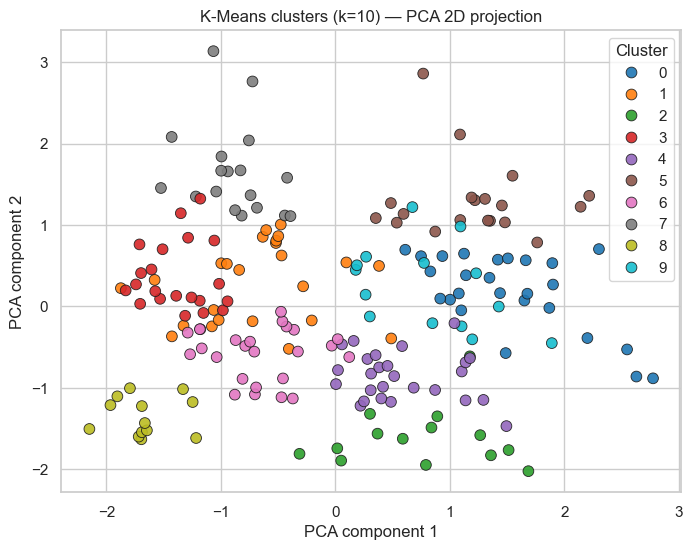

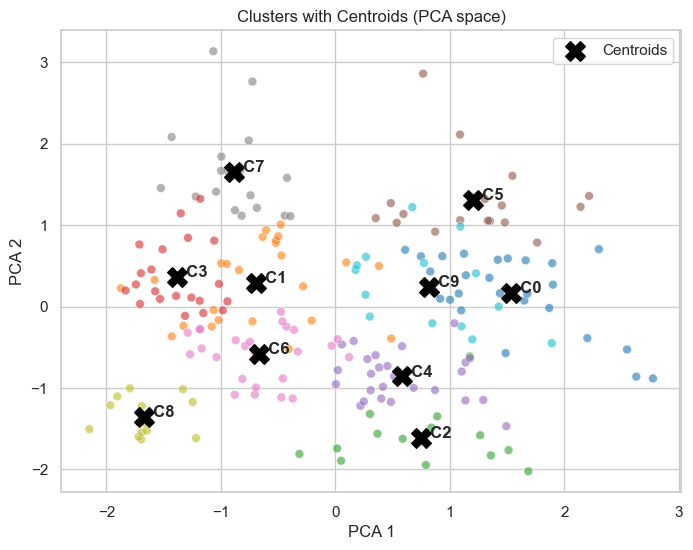

In [53]:

pltcltcentrod = PCA(n_components=2, random_state=42)
X_pltcltcentrod = pltcltcentrod.fit_transform(CopyMallCsdt_scaled)

plt.figure(figsize=(8,6))
palette = sns.color_palette("tab10", kmostrangd)
sns.scatterplot(x=X_pltcltcentrod[:,0], y=X_pltcltcentrod[:,1], hue=CopyMallCsdt['Cluster'], palette=palette, s=60, alpha=0.9, edgecolor='k')
plt.title(f'K-Means clusters (k={kmostrangd}) — PCA 2D projection')
plt.xlabel('PCA component 1')
plt.ylabel('PCA component 2')
plt.legend(title='Cluster')
plt.show()


centroids_scaled = kmeans.cluster_centers_ 
centroids_pltcltcentrod = pltcltcentrod.transform(centroids_scaled)
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pltcltcentrod[:,0], y=X_pltcltcentrod[:,1], hue=CopyMallCsdt['Cluster'], palette=palette, s=40, alpha=0.6, legend=False)
plt.scatter(centroids_pltcltcentrod[:,0], centroids_pltcltcentrod[:,1], marker='X', s=200, c='black', label='Centroids')
for i, (x,y) in enumerate(centroids_pltcltcentrod):
    plt.text(x, y, f'  C{i}', fontsize=12, weight='bold')
plt.title('Clusters with Centroids (PCA space)')
plt.xlabel('PCA 1'); plt.ylabel('PCA 2')
plt.legend()
plt.show()


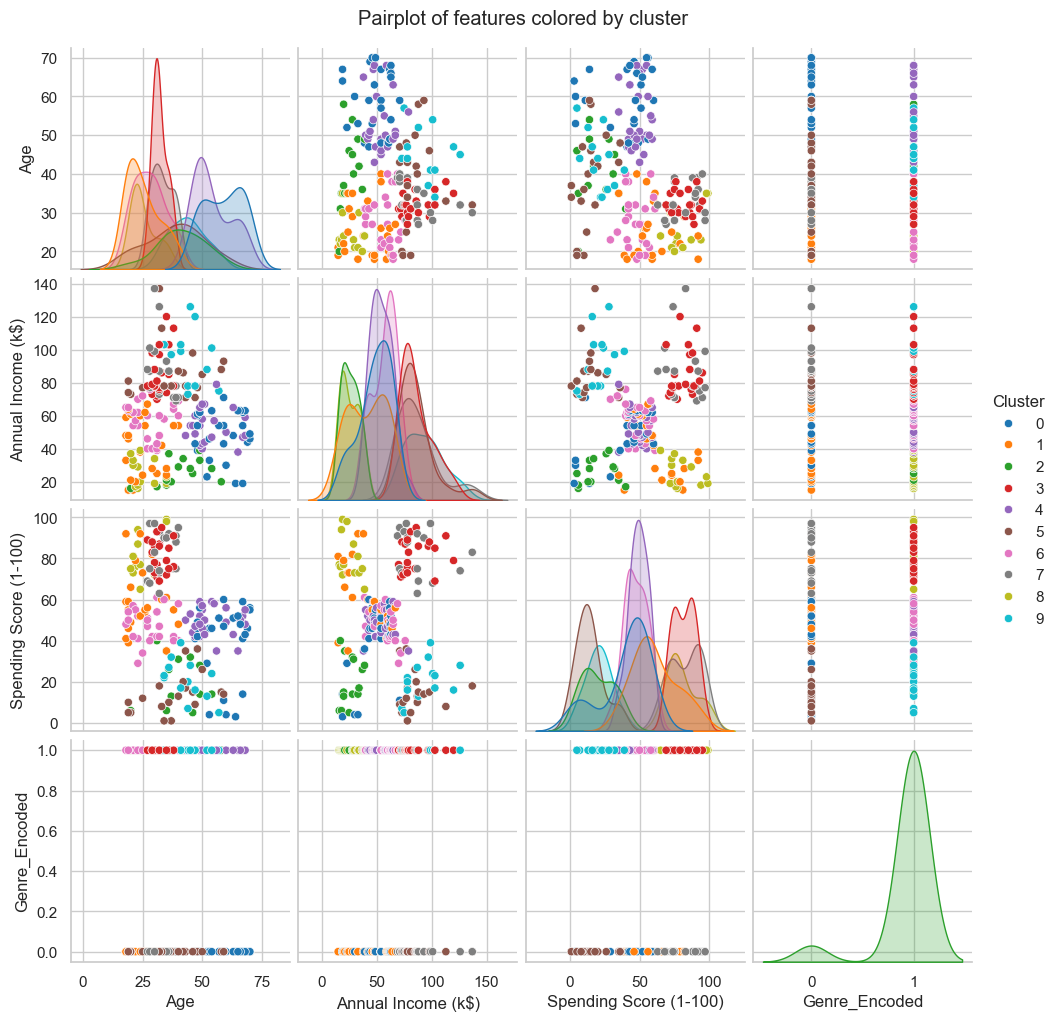

In [54]:

Devpltclsts = CopyMallCsdt[features + ['Cluster']].copy()
Devpltclsts['Cluster'] = Devpltclsts['Cluster'].astype('category')
sns.pairplot(Devpltclsts, hue='Cluster', diag_kind='kde', corner=False, palette=palette)
plt.suptitle("Pairplot of features colored by cluster", y=1.02)
plt.show()



Cluster sizes:
 Cluster
0    26
1    24
2    14
3    21
4    26
5    19
6    25
7    18
8    13
9    14
Name: count, dtype: int64

Cluster means:
            Age  Annual Income (k$)  Spending Score (1-100)  Genre_Encoded
Cluster                                                                  
0        58.85               48.69                   39.85           0.00
1        25.25               41.25                   60.92           0.00
2        41.21               26.07                   20.14           0.93
3        32.19               86.05                   81.67           1.00
4        54.15               54.23                   48.96           1.00
5        38.47               85.89                   14.21           0.00
6        27.96               57.36                   47.12           1.00
7        33.28               87.11                   82.67           0.00
8        25.46               25.69                   80.54           1.00
9        43.79               93.29    

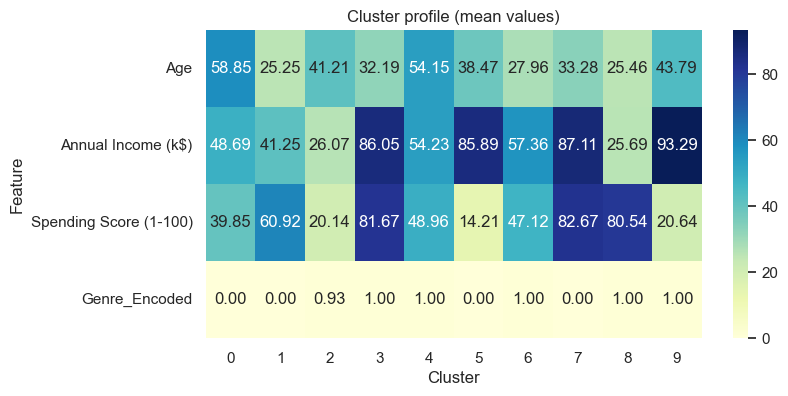

In [55]:
cluster_profile = CopyMallCsdt.groupby('Cluster')[features].agg(['mean','count']).round(2)
cluster_means = CopyMallCsdt.groupby('Cluster')[features].mean().round(2)
cluster_sizes = CopyMallCsdt['Cluster'].value_counts().sort_index()

print("\nCluster sizes:\n", cluster_sizes)
print("\nCluster means:\n", cluster_means)

plt.figure(figsize=(8,4))
sns.heatmap(cluster_means.T, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title("Cluster profile (mean values)")
plt.xlabel("Cluster")
plt.ylabel("Feature")
plt.show()


In [56]:

overall_income = CopyMallCsdt['Annual Income (k$)'].mean()
overall_spend = CopyMallCsdt['Spending Score (1-100)'].mean()

print("\nRecommendations and short insights by cluster:")
for c in sorted(CopyMallCsdt['Cluster'].unique()):
    row = cluster_means.loc[c]
    size = int(cluster_sizes.loc[c])
    age_mean = float(row['Age'])
    income_mean = float(row['Annual Income (k$)'])
    spend_mean = float(row['Spending Score (1-100)'])
    print(f"\n--- Cluster {c} (n={size}) ---")
    print(f"Avg Age: {age_mean:.1f}, Avg Income (k$): {income_mean:.1f}, Avg SpendingScore: {spend_mean:.1f}")
    # simple rules:
    if spend_mean > overall_spend and income_mean > overall_income:
        print("-> Premium & engaged: target with premium upsell, loyalty programs.")
    elif spend_mean > overall_spend and income_mean <= overall_income:
        print("-> High spend, lower income: promote value bundles and financing options.")
    elif spend_mean <= overall_spend and income_mean > overall_income:
        print("-> High-income but low spend: personalized outreach, exclusive offers to boost engagement.")
    else:
        print("-> Low spenders: awareness campaigns, email nurture and discount experiments.")


Recommendations and short insights by cluster:

--- Cluster 0 (n=26) ---
Avg Age: 58.9, Avg Income (k$): 48.7, Avg SpendingScore: 39.9
-> Low spenders: awareness campaigns, email nurture and discount experiments.

--- Cluster 1 (n=24) ---
Avg Age: 25.2, Avg Income (k$): 41.2, Avg SpendingScore: 60.9
-> High spend, lower income: promote value bundles and financing options.

--- Cluster 2 (n=14) ---
Avg Age: 41.2, Avg Income (k$): 26.1, Avg SpendingScore: 20.1
-> Low spenders: awareness campaigns, email nurture and discount experiments.

--- Cluster 3 (n=21) ---
Avg Age: 32.2, Avg Income (k$): 86.0, Avg SpendingScore: 81.7
-> Premium & engaged: target with premium upsell, loyalty programs.

--- Cluster 4 (n=26) ---
Avg Age: 54.1, Avg Income (k$): 54.2, Avg SpendingScore: 49.0
-> Low spenders: awareness campaigns, email nurture and discount experiments.

--- Cluster 5 (n=19) ---
Avg Age: 38.5, Avg Income (k$): 85.9, Avg SpendingScore: 14.2
-> High-income but low spend: personalized outre